# Solve a boundary value problem

We solve the boundary value problem
$$
\frac{d^2u}{dx^2} = -\frac{\pi^2}{4} \left(u + 1\right)
$$

 with Dirichlet boundary conditions $u(0)=0$ and $u(1)=1$.


This is discretized as : 

$$
\frac{(2 u_i - u_{i+1} - u_{i-1}) }{ h^2 } = \frac{\pi^2}{4}  \left(u_i + 1\right)
$$


In [1]:
import numpy as np
from scipy.sparse import diags, linalg
from matplotlib import pyplot as plt

### Analytic solution

This is a simple harmonic oscillator. We set

$$
v(x) = u(x)+1
$$

So the general solution is

$$
v(x) = A\cos(\omega x) + B\sin(\omega x)
$$

We can see $\omega = \pi/2$, and then we solve the boundary conditions $v(0)=u(0)+1=0+1=1$ and $v(1)=u(1)+1=1+1=2$, so the coefficients are $A=1$ and $B=2$. We then change variables back to $u$ and get

$$
u(x) = \cos\left(\frac{\pi}{2}x\right) + 2\sin\left(\frac{\pi}{2}x\right) -1
$$

In [2]:
def analytic(x):
    return -1. + np.cos(np.pi*0.5*x)+2.*np.sin(np.pi*0.5*x)

### Set up the equation and initial conditions

In [3]:
N = 4
h = 0.01
c = h**2 * np.pi**2 * 0.25
u0 = np.full(N, c)
u0[-1] = 1.+c

## Make the sparse matrix

We don't need to store the full array (although we print it with `toarray` for demonstration). 

In [4]:
diagonals = [ np.full(N, 2-c), np.full(N-1,-1), np.full(N-1,-1)]
# Here "CSC" means "Compressed Sparse Column"
T = diags(diagonals, [0,-1,1], format = 'csc')
print(T.toarray())

[[ 1.99975326 -1.          0.          0.        ]
 [-1.          1.99975326 -1.          0.        ]
 [ 0.         -1.          1.99975326 -1.        ]
 [ 0.          0.         -1.          1.99975326]]


In [5]:
u = u0

## We now solve the sparse equation with `scipy`

In [6]:
u = linalg.splu(T).solve(u0)

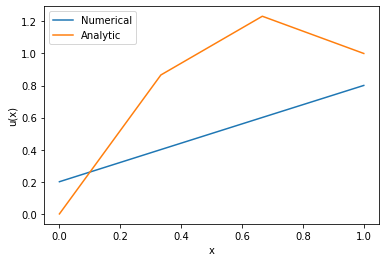

In [7]:
x = np.linspace(0,1,len(u))
plt.plot(x,u, label="Numerical")
plt.plot(x,analytic(x), label="Analytic")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()